# Q2b - Evaluate whether older planes suffer more delays on a year-to-year basis.

## **Reading in files**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_2004 = pd.read_csv ('2004.csv.bz2')
df_2005 = pd.read_csv ('2005.csv.bz2')
df_2006 = pd.read_csv ('2006.csv.bz2')
df_2007 = pd.read_csv ('2007.csv.bz2')
df_2008 = pd.read_csv ('2008.csv.bz2')

airports = pd.read_csv('airports.csv')

carriers = pd.read_csv('carriers.csv')

planedata = pd.read_csv('plane-data.csv')

variable_descriptions = pd.read_csv('variable-descriptions.csv')

In [5]:
planedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tailnum        5029 non-null   object 
 1   type           4480 non-null   object 
 2   manufacturer   4480 non-null   object 
 3   issue_date     4479 non-null   object 
 4   model          4480 non-null   object 
 5   status         4480 non-null   object 
 6   aircraft_type  4480 non-null   object 
 7   engine_type    4477 non-null   object 
 8   year           4335 non-null   float64
dtypes: float64(1), object(8)
memory usage: 353.7+ KB


In [6]:
print(df_2004.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


## Identifying and cross referencing flights in planedata with each corresponding df

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Making dfs for each year
actuallyflew_2004 = df_2004[df_2004['TailNum'].isin(planedata['tailnum'])]
actuallyflew_2005 = df_2004[df_2004['TailNum'].isin(planedata['tailnum'])]
actuallyflew_2006 = df_2004[df_2004['TailNum'].isin(planedata['tailnum'])]
actuallyflew_2007 = df_2004[df_2004['TailNum'].isin(planedata['tailnum'])]
actuallyflew_2008 = df_2004[df_2004['TailNum'].isin(planedata['tailnum'])]

# adding year to actuallyflew_200X
actuallyflew_2004 = actuallyflew_2004.merge(planedata[['tailnum', 'year']],
                                           left_on = 'TailNum',
                                           right_on = 'tailnum',
                                           how = 'left')
actuallyflew_2005 = actuallyflew_2005.merge(planedata[['tailnum', 'year']],
                                           left_on = 'TailNum',
                                           right_on = 'tailnum',
                                           how = 'left')
actuallyflew_2006 = actuallyflew_2006.merge(planedata[['tailnum', 'year']],
                                           left_on = 'TailNum',
                                           right_on = 'tailnum',
                                           how = 'left')
actuallyflew_2007 = actuallyflew_2007.merge(planedata[['tailnum', 'year']],
                                           left_on = 'TailNum',
                                           right_on = 'tailnum',
                                           how = 'left')
actuallyflew_2008 = actuallyflew_2008.merge(planedata[['tailnum', 'year']],
                                           left_on = 'TailNum',
                                           right_on = 'tailnum',
                                           how = 'left')

# Drop NaNs and 0s in 'year'
actuallyflew_2004 = actuallyflew_2004.loc[(actuallyflew_2004['year'].notna()) & (actuallyflew_2004['year'] != 0)] # used & 
actuallyflew_2005 = actuallyflew_2005.loc[(actuallyflew_2005['year'].notna()) & (actuallyflew_2005['year'] != 0)]
actuallyflew_2006 = actuallyflew_2006.loc[(actuallyflew_2006['year'].notna()) & (actuallyflew_2006['year'] != 0)]
actuallyflew_2007 = actuallyflew_2007.loc[(actuallyflew_2007['year'].notna()) & (actuallyflew_2007['year'] != 0)]
actuallyflew_2008 = actuallyflew_2008.loc[(actuallyflew_2008['year'].notna()) & (actuallyflew_2008['year'] != 0)]

In [17]:
# Making 'age' variable based on 'year' 
actuallyflew_2004.loc[:, 'age'] = 2004 - actuallyflew_2004['year'] # using .loc[:,
actuallyflew_2005.loc[:, 'age'] = 2005 - actuallyflew_2005['year'] 
actuallyflew_2006.loc[:, 'age'] = 2006 - actuallyflew_2006['year']
actuallyflew_2007.loc[:, 'age'] = 2007 - actuallyflew_2007['year']
actuallyflew_2008.loc[:, 'age'] = 2008 - actuallyflew_2008['year']

# Adding previously made delay column, returning dataframe, Nan = 0 is treated as skipping 
df_2004['Delay']=(df_2004[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2005['Delay']=(df_2005[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2006['Delay']=(df_2006[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2007['Delay']=(df_2007[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2008['Delay']=(df_2008[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))

# adding delay columns to actually flew dfs
actuallyflew_2004['Delay'] = df_2004['Delay']
actuallyflew_2005['Delay'] = df_2005['Delay']
actuallyflew_2006['Delay'] = df_2006['Delay']
actuallyflew_2007['Delay'] = df_2007['Delay']
actuallyflew_2008['Delay'] = df_2008['Delay']

# but basing it on actuallyflew_200X as this is what would actually appear on each year 
# Previous iteration: actuallyflew_2004['TDelay_04']=(df_2004[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
# Previous iteration: actuallyflew_2008['TDelay_08']=(actuallyflew_2008[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
#actuallyflew_2004 = pd.merge(actuallyflew_2004, df_2004[['TailNum','TDelay_04']], left_on = 'tailnum', right_on = 'TailNum', how = 'left')
#actuallyflew_2005 = pd.merge(actuallyflew_2005, df_2005[['TailNum','TDelay_05']], left_on = 'tailnum', right_on = 'TailNum', how = 'left')
#actuallyflew_2006 = pd.merge(actuallyflew_2006, df_2006[['TailNum','TDelay_06']], left_on = 'tailnum', right_on = 'TailNum', how = 'left')
#actuallyflew_2007 = pd.merge(actuallyflew_2007, df_2007[['TailNum','TDelay_07']], left_on = 'tailnum', right_on = 'TailNum', how = 'left')
#actuallyflew_2008 = pd.merge(actuallyflew_2008, df_2008[['TailNum','TDelay_08']], left_on = 'tailnum', right_on = 'TailNum', how = 'left')

## Distribution of delayed flights - Avg delay of individual planes & age 

In [51]:
# avg individual plane delays
# defining function:
def add_avg_delay(df, year):
    if "Avg_idv_Delay" not in df.columns:
        idv_avgdelay = df.groupby("TailNum", as_index = False)["Delay"].mean()
        idv_avgdelay = idv_avgdelay.rename(columns = {"Delay": "Avg_idv_Delay"})
        df = df.merge(idv_avgdelay, on = "TailNum", how = "left")
    return df

actuallyflew_2004 = add_avg_delay(actuallyflew_2004, 2004)
actuallyflew_2005 = add_avg_delay(actuallyflew_2005, 2005)
actuallyflew_2006 = add_avg_delay(actuallyflew_2006, 2006)
actuallyflew_2007 = add_avg_delay(actuallyflew_2007, 2007)
actuallyflew_2008 = add_avg_delay(actuallyflew_2008, 2008)

actuallyflew_dfs = {
    2004: actuallyflew_2004,
    2005: actuallyflew_2005,
    2006: actuallyflew_2006,
    2007: actuallyflew_2007,
    2008: actuallyflew_2008
}

# for loop
for year, df in actuallyflew_dfs.items():
    sns.histplot(df['Avg_idv_Delay'], stat = 'density')
    plt.title(f"Distribution of individual avg.delays and Age({year})")
    plt.xlabel("Average delay per plane(min)")
    plt.ylabel("F.Density")
    plt.tight_layout()
    plt.savefig(f"Distribution of individual avg.delays and Age({year}).png")
    plt.clf()
    plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## Distribution of delayed flights - Avg delay & plane age

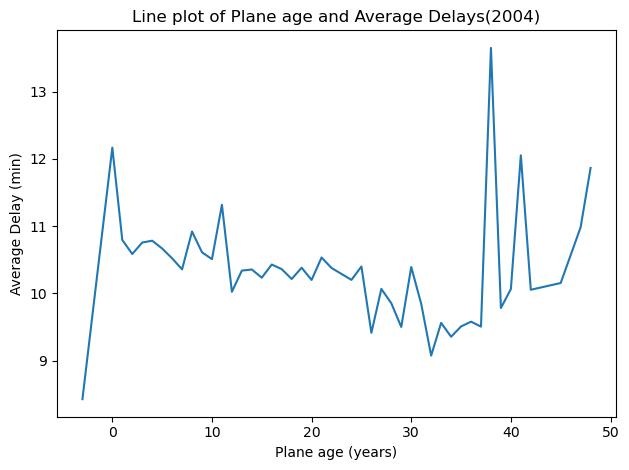

In [54]:
#actuallyflew_2004_delayed = actuallyflew_2004[actuallyflew_2004['Delay'] > 0] #Filtering only delayed flights 

# visualisation - scatterplot with colours, one for each year 
#sns.regplot(data = actuallyflew_2004_delayed, y = 'Delay', x = 'age', fit_reg=True)
#plt.title('Scatterplot of Plane age and Delays(2004)')
#plt.xlabel('Plane age (years)')
#plt.ylabel('Total Delay (min)')
#plt.tight_layout()
#plt.show()
#plt.savefig("Scatterplot")

avgdelay_age_2004 = actuallyflew_2004.groupby('age')['Delay'].mean().reset_index() # changed to df from series 
avgdelay_age_2005 = actuallyflew_2005.groupby('age')['Delay'].mean().reset_index()
avgdelay_age_2006 = actuallyflew_2006.groupby('age')['Delay'].mean().reset_index()
avgdelay_age_2007 = actuallyflew_2007.groupby('age')['Delay'].mean().reset_index()
avgdelay_age_2008 = actuallyflew_2008.groupby('age')['Delay'].mean().reset_index()

sns.lineplot(data = avgdelay_age_2004, x = 'age', y = 'Delay')
plt.title('Line plot of Plane age and Average Delays(2004)')
plt.xlabel('Plane age (years)')
plt.ylabel('Average Delay (min)')
plt.tight_layout()
plt.show()
#plt.savefig("Lineplot")

### Years

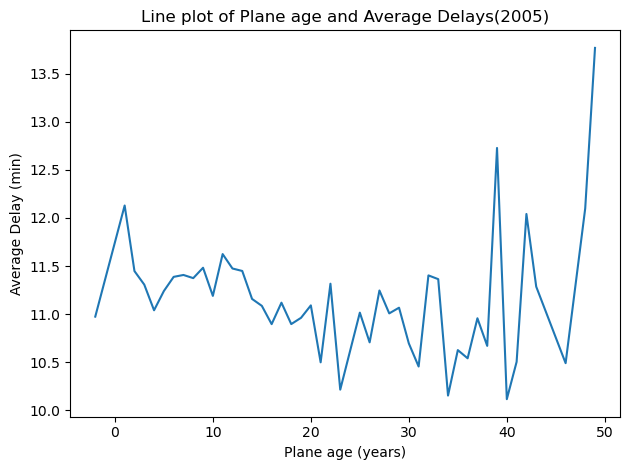

In [56]:
sns.lineplot(data = avgdelay_age_2005, x = 'age', y = 'Delay')
plt.title('Line plot of Plane age and Average Delays(2005)')
plt.xlabel('Plane age (years)')
plt.ylabel('Average Delay (min)')
plt.tight_layout()
plt.show()
#plt.savefig("Lineplot")

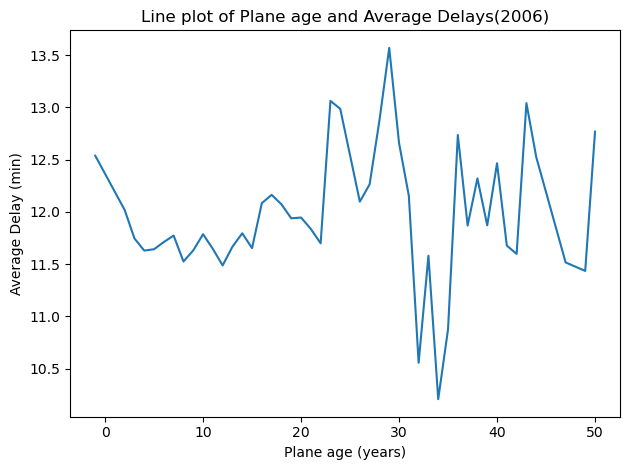

In [57]:
sns.lineplot(data = avgdelay_age_2006, x = 'age', y = 'Delay')
plt.title('Line plot of Plane age and Average Delays(2006)')
plt.xlabel('Plane age (years)')
plt.ylabel('Average Delay (min)')
plt.tight_layout()
plt.show()
#plt.savefig("Lineplot")

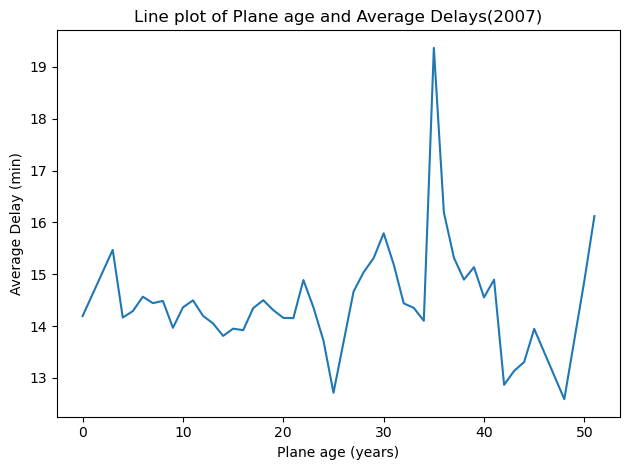

In [58]:
sns.lineplot(data = avgdelay_age_2007, x = 'age', y = 'Delay')
plt.title('Line plot of Plane age and Average Delays(2007)')
plt.xlabel('Plane age (years)')
plt.ylabel('Average Delay (min)')
plt.tight_layout()
plt.show()
#plt.savefig("Lineplot")

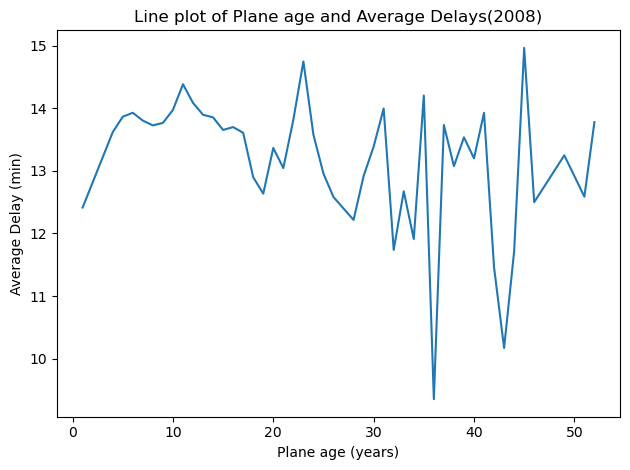

In [59]:
sns.lineplot(data = avgdelay_age_2008, x = 'age', y = 'Delay')
plt.title('Line plot of Plane age and Average Delays(2008)')
plt.xlabel('Plane age (years)')
plt.ylabel('Average Delay (min)')
plt.tight_layout()
plt.show()
#plt.savefig("Lineplot")

## Distribution of non-delay flights - Histogram

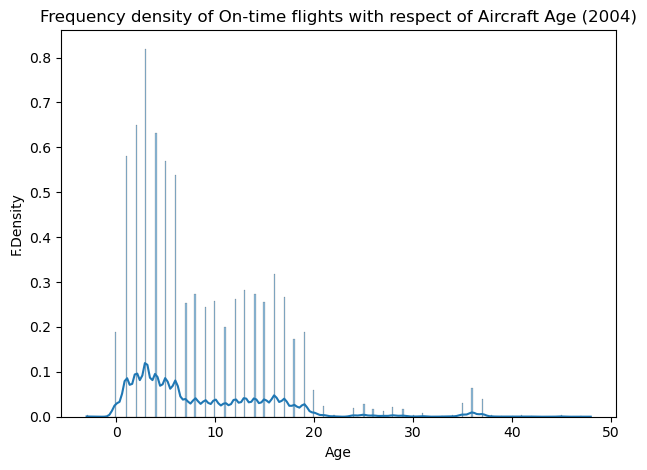

<Figure size 640x480 with 0 Axes>

In [61]:
# Adding binary column - on_time (Yes = 0, No = 1), TDelay_0X = 0
df_2004['age'] = actuallyflew_2004['age'] # adding age olumn first
df_2004['on_time'] = (df_2004['Delay'] == 0).astype(int)

ontime_2004 = df_2004[df_2004['on_time'] == 1]

sns.histplot(data = ontime_2004, x = 'age', stat ='density', bins = 'auto', kde=True)
plt.title("Frequency density of On-time flights with respect of Aircraft Age (2004)")
plt.xlabel("Age")
plt.ylabel("F.Density")
plt.tight_layout()
plt.show()
plt.savefig("Histogram - Non delayed flights,2004.png")

### Years

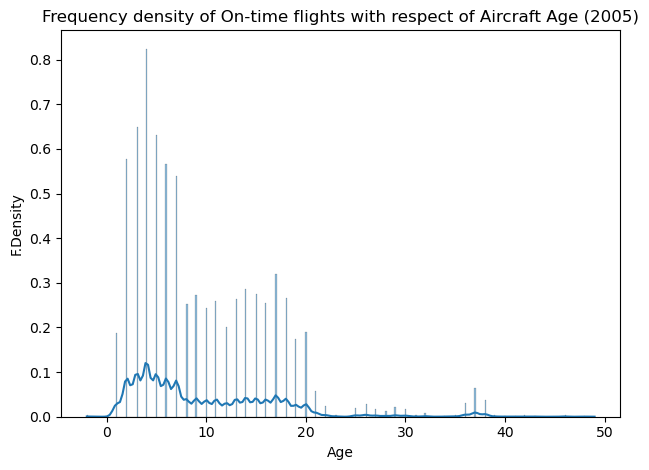

<Figure size 640x480 with 0 Axes>

In [63]:
# Adding binary column - on_time (Yes = 0, No = 1), TDelay_0X = 0
df_2005['age'] = actuallyflew_2005['age'] # adding age column first
df_2005['on_time'] = (df_2005['Delay'] == 0).astype(int)

ontime_2005 = df_2005[df_2005['on_time'] == 1]

sns.histplot(data = ontime_2005, x = 'age', stat ='density', bins = 'auto', kde=True)
plt.title("Frequency density of On-time flights with respect of Aircraft Age (2005)")
plt.xlabel("Age")
plt.ylabel("F.Density")
plt.tight_layout()
plt.show()
plt.savefig("Histogram - Non delayed flights,2005.png")

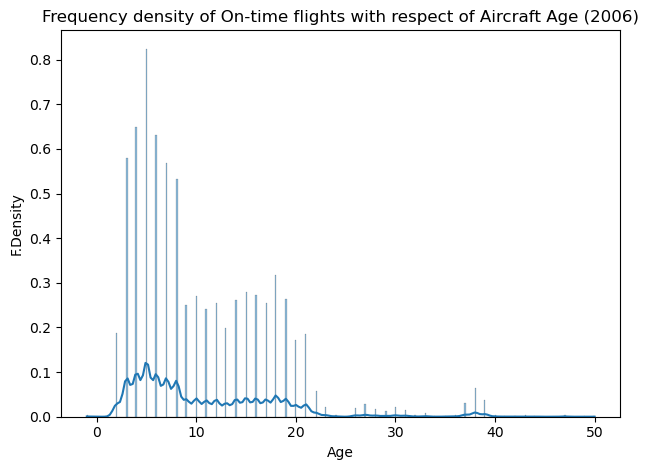

<Figure size 640x480 with 0 Axes>

In [64]:
# Adding binary column - on_time (Yes = 0, No = 1), TDelay_0X = 0
df_2006['age'] = actuallyflew_2006['age'] # adding age column first
df_2006['on_time'] = (df_2006['Delay'] == 0).astype(int)

ontime_2006 = df_2006[df_2006['on_time'] == 1]

sns.histplot(data = ontime_2006, x = 'age', stat ='density', bins = 'auto', kde=True)
plt.title("Frequency density of On-time flights with respect of Aircraft Age (2006)")
plt.xlabel("Age")
plt.ylabel("F.Density")
plt.tight_layout()
plt.show()
plt.savefig("Histogram - Non delayed flights,2006.png")

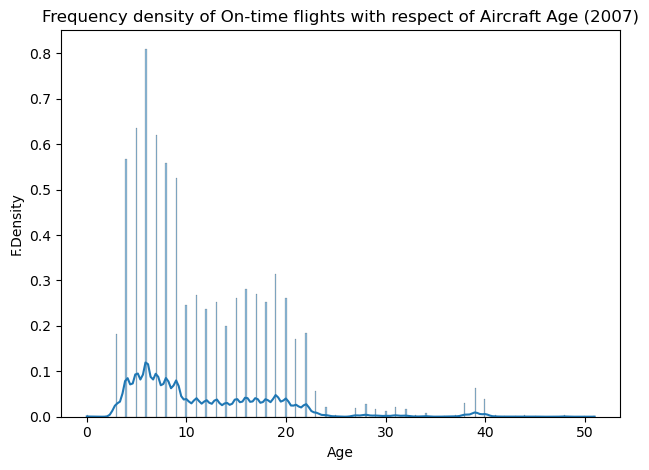

<Figure size 640x480 with 0 Axes>

In [65]:
# Adding binary column - on_time (Yes = 0, No = 1), TDelay_0X = 0
df_2007['age'] = actuallyflew_2007['age'] # adding age column first
df_2007['on_time'] = (df_2007['Delay'] == 0).astype(int)

ontime_2007 = df_2007[df_2007['on_time'] == 1]

sns.histplot(data = ontime_2007, x = 'age', stat ='density', bins = 'auto', kde=True)
plt.title("Frequency density of On-time flights with respect of Aircraft Age (2007)")
plt.xlabel("Age")
plt.ylabel("F.Density")
plt.tight_layout()
plt.show()
plt.savefig("Histogram - Non delayed flights,2007.png")

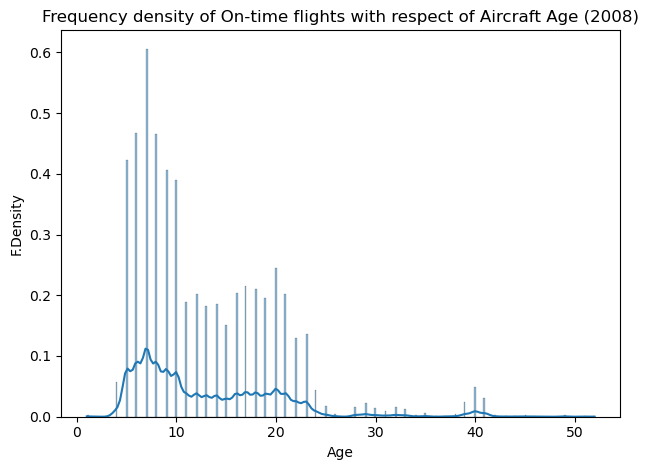

<Figure size 640x480 with 0 Axes>

In [66]:
# Adding binary column - on_time (Yes = 0, No = 1), TDelay_0X = 0
df_2008['age'] = actuallyflew_2008['age'] # adding age column first
df_2008['on_time'] = (df_2008['Delay'] == 0).astype(int)

ontime_2008 = df_2008[df_2008['on_time'] == 1]

sns.histplot(data = ontime_2008, x = 'age', stat ='density', bins = 'auto', kde=True)
plt.title("Frequency density of On-time flights with respect of Aircraft Age (2008)")
plt.xlabel("Age")
plt.ylabel("F.Density")
plt.tight_layout()
plt.show()
plt.savefig("Histogram - Non delayed flights,2008.png")

## Understanding the data

In [68]:
actuallyflew_2004.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'tailnum', 'year', 'age', 'Delay', 'Avg_idv_Delay_x', 'Avg_idv_Delay_y',
       'Avg_idv_Delay'],
      dtype='object')

In [69]:
# to determine values age can take. Ages initally printed went up to 2004 years, meaning year = 0 
print(actuallyflew_2004['age'].max())
print(actuallyflew_2004['year'].min())

print(actuallyflew_2005["age"].max())
print(actuallyflew_2005['year'].min())

print(actuallyflew_2006["age"].max())
print(actuallyflew_2006['year'].min())

print(actuallyflew_2007["age"].max())
print(actuallyflew_2007['year'].min())

print(actuallyflew_2008["age"].max())
print(actuallyflew_2008['year'].min())

48.0
1956.0
49.0
1956.0
50.0
1956.0
51.0
1956.0
52.0
1956.0


In [70]:
# getting lowest values of year which arent NaN 
print("2004:",actuallyflew_2004['year'].dropna().head())
print("2005:",actuallyflew_2005['year'].dropna().head())
print("2006:",actuallyflew_2006['year'].dropna().head())
print("2007:",actuallyflew_2007['year'].dropna().head())
print("2008:",actuallyflew_2008['year'].dropna().head())

2004: 0    1998.0
1    2002.0
2    1996.0
3    1999.0
4    2000.0
Name: year, dtype: float64
2005: 0    1998.0
1    2002.0
2    1996.0
3    1999.0
4    2000.0
Name: year, dtype: float64
2006: 0    1998.0
1    2002.0
2    1996.0
3    1999.0
4    2000.0
Name: year, dtype: float64
2007: 0    1998.0
1    2002.0
2    1996.0
3    1999.0
4    2000.0
Name: year, dtype: float64
2008: 0    1998.0
1    2002.0
2    1996.0
3    1999.0
4    2000.0
Name: year, dtype: float64


In [71]:
actuallyflew_2004

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,NASDelay,SecurityDelay,LateAircraftDelay,tailnum,year,age,Delay,Avg_idv_Delay_x,Avg_idv_Delay_y,Avg_idv_Delay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,0,0,0,N805UA,1998.0,6.0,0,9.511295,9.511295,9.511295
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,0,0,0,N851UA,2002.0,2.0,0,8.309870,8.309870,8.309870
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,0,0,0,N436UA,1996.0,8.0,0,10.937660,10.937660,10.937660
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,0,0,0,N828UA,1999.0,5.0,0,11.234578,11.234578,11.234578
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,0,0,0,N831UA,2000.0,4.0,0,9.735361,9.735361,9.735361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420395,2004,12,16,4,1645.0,1639,1715.0,1716,DL,1138,...,0,0,0,N995DL,1991.0,13.0,0,10.091825,10.091825,10.091825
4420396,2004,12,16,4,726.0,720,1238.0,1239,DL,1139,...,0,0,0,N916DE,1993.0,11.0,0,13.445895,13.445895,13.445895
4420397,2004,12,16,4,1336.0,1330,1507.0,1504,DL,1139,...,0,0,0,N916DE,1993.0,11.0,0,13.445895,13.445895,13.445895
4420398,2004,12,16,4,538.0,540,720.0,723,DL,1140,...,0,0,0,N990DL,1991.0,13.0,0,10.989005,10.989005,10.989005


## Distribution of Aircraft ages

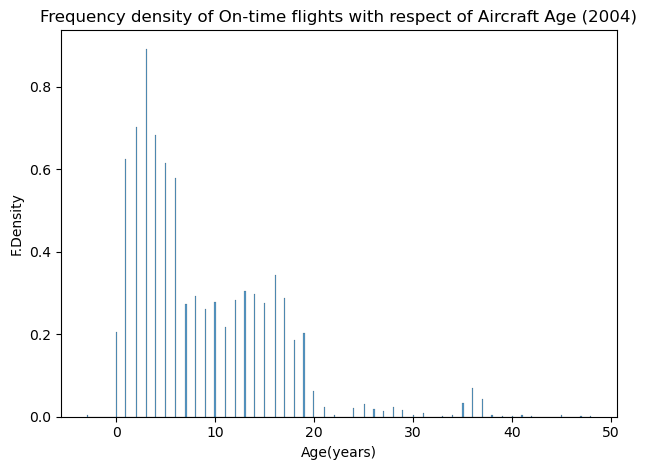

<Figure size 640x480 with 0 Axes>

In [73]:
# 2004
sns.histplot(data = actuallyflew_2004, x = 'age', stat = 'density',bins = 'auto')
plt.tight_layout()
plt.show
plt.title("Frequency density of On-time flights with respect of Aircraft Age (2004)")
plt.xlabel("Age(years)")
plt.ylabel("F.Density")
plt.tight_layout()
plt.show()
plt.savefig("Histogram - age distribution per year (2004).png")

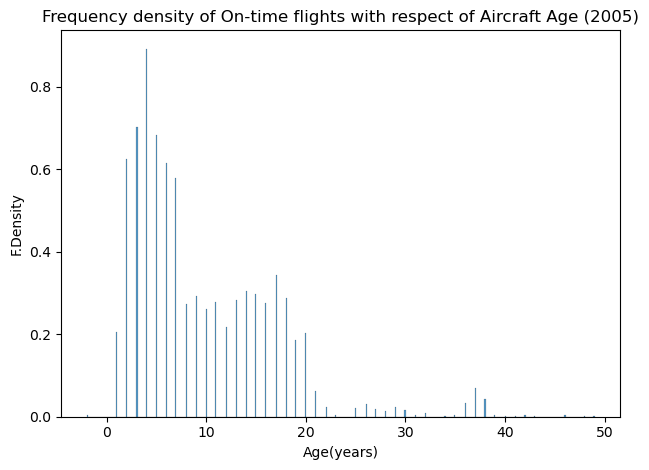

<Figure size 640x480 with 0 Axes>

In [74]:
# 2005
sns.histplot(data = actuallyflew_2005, x = 'age', stat = 'density',bins = 'auto')
plt.tight_layout()
plt.show
plt.title("Frequency density of On-time flights with respect of Aircraft Age (2005)")
plt.xlabel("Age(years)")
plt.ylabel("F.Density")
plt.tight_layout()
plt.show()
plt.savefig("Histogram - age distribution per year (2005).png")

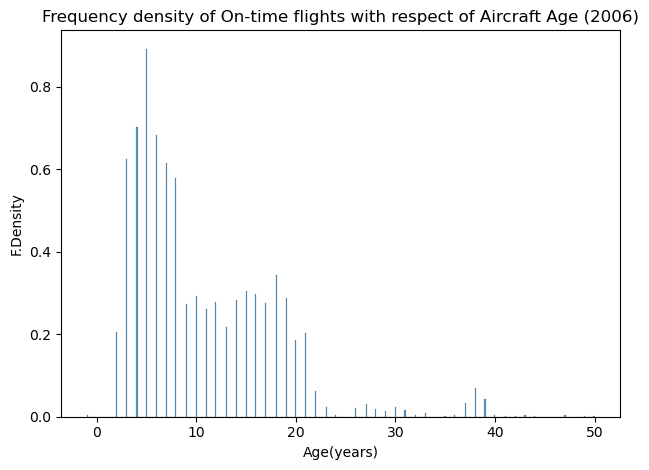

<Figure size 640x480 with 0 Axes>

In [75]:
# 2006
sns.histplot(data = actuallyflew_2006, x = 'age', stat = 'density',bins = 'auto')
plt.tight_layout()
plt.show
plt.title("Frequency density of On-time flights with respect of Aircraft Age (2006)")
plt.xlabel("Age(years)")
plt.ylabel("F.Density")
plt.tight_layout()
plt.show()
plt.savefig("Histogram - age distribution per year (2006).png")

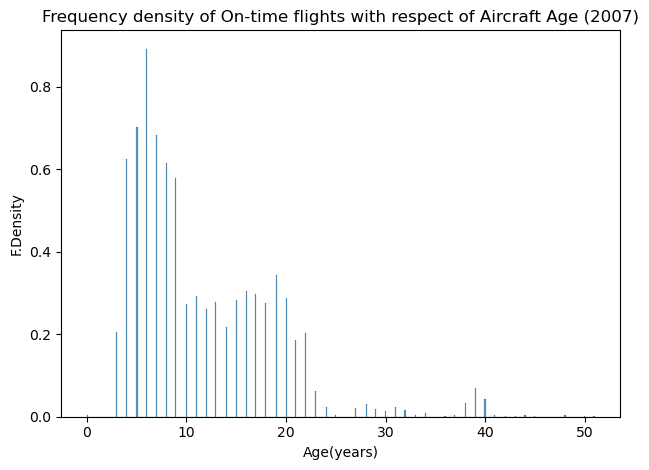

<Figure size 640x480 with 0 Axes>

In [76]:
# 2007
sns.histplot(data = actuallyflew_2007, x = 'age', stat = 'density',bins = 'auto')
plt.tight_layout()
plt.show
plt.title("Frequency density of On-time flights with respect of Aircraft Age (2007)")
plt.xlabel("Age(years)")
plt.ylabel("F.Density")
plt.tight_layout()
plt.show()
plt.savefig("Histogram - age distribution per year (2007).png")

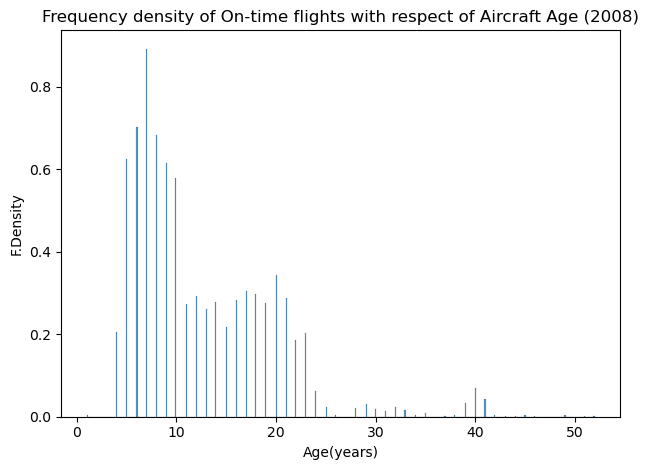

<Figure size 640x480 with 0 Axes>

In [77]:
# 2008
sns.histplot(data = actuallyflew_2008, x = 'age', stat = 'density',bins = 'auto')
plt.tight_layout()
plt.show
plt.title("Frequency density of On-time flights with respect of Aircraft Age (2008)")
plt.xlabel("Age(years)")
plt.ylabel("F.Density")
plt.tight_layout()
plt.show()
plt.savefig("Histogram - age distribution per year (2008).png")

## Why 'issue date' was not chosen - Also, issue date is an object

In [39]:
# number of non-usable variables - year
negativeage_count4 = (actuallyflew_2004['age'] < 0).sum()
negativeage_count5 = (actuallyflew_2005['age'] < 0).sum()
negativeage_count6 = (actuallyflew_2006['age'] < 0).sum()
negativeage_count7 = (actuallyflew_2007['age'] < 0).sum()
negativeage_count8 = (actuallyflew_2008['age'] < 0).sum()

# Since issue date is an object, we convert it to date time; ruling it out as the correct variable to calculate age.
import pandas as pd
actuallyflew_2004['issue_date'] = pd.to_datetime(actuallyflew_2004['issue_date'])
actuallyflew_2005['issue_date'] = pd.to_datetime(actuallyflew_2005['issue_date'])
actuallyflew_2006['issue_date'] = pd.to_datetime(actuallyflew_2006['issue_date'])
actuallyflew_2007['issue_date'] = pd.to_datetime(actuallyflew_2007['issue_date'])
actuallyflew_2008['issue_date'] = pd.to_datetime(actuallyflew_2008['issue_date'])

# Making 'age_id' variable based on 'issue_date' 
actuallyflew_2004.loc[:,"age_id"] = 2004 - actuallyflew_2004["issue_date"].dt.year # to allow subtraction and return the year
actuallyflew_2005.loc[:,"age_id"] = 2005 - actuallyflew_2005["issue_date"].dt.year
actuallyflew_2006.loc[:,"age_id"] = 2006 - actuallyflew_2006["issue_date"].dt.year
actuallyflew_2007.loc[:,"age_id"] = 2007 - actuallyflew_2007["issue_date"].dt.year
actuallyflew_2008.loc[:,"age_id"] = 2008 - actuallyflew_2008["issue_date"].dt.year

# number of non-usable variables - issue date
negativeage_count_id4 = (actuallyflew_2004['age_id'] < 0).sum()
negativeage_count_id5 = (actuallyflew_2005['age_id'] < 0).sum()
negativeage_count_id6 = (actuallyflew_2006['age_id'] < 0).sum()
negativeage_count_id7 = (actuallyflew_2007['age_id'] < 0).sum()
negativeage_count_id8 = (actuallyflew_2008['age_id'] < 0).sum()

print(
    "NegativeCounts based on issue date:" +
    str(negativeage_count_id4) + "," +
    str(negativeage_count_id5) + "," +
    str(negativeage_count_id6) + "," +
    str(negativeage_count_id7) + "," +
    str(negativeage_count_id8),
    
    "Negative Counts based on year:" +
    str(negativeage_count4) + "," +
    str(negativeage_count5) + "," +
    str(negativeage_count6) + "," +
    str(negativeage_count7) + "," +
    str(negativeage_count8) 
)

NegativeCounts based on issue date:416,319,261,63,0 Negative Counts based on year:3,3,3,0,0
